In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img



In [4]:
# Set paths
input_folder = 'ambar'
output_folder = 'augumented'


In [5]:
# Create an instance of the ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [6]:
# Load and augment each image
for image_file in os.listdir(input_folder):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        img = load_img(os.path.join(input_folder, image_file))  # Load image
        x = img_to_array(img)  # Convert image to array
        x = x.reshape((1,) + x.shape)  # Reshape to (1, width, height, channels)
        
        # Generate and save 5 augmented images for each original image
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_folder, save_prefix='ambar', save_format='jpg'):
            i += 1
            if i > 5:  # Change this value to generate more images per original image
                break
print("Augmentation complete!")

KeyboardInterrupt: 

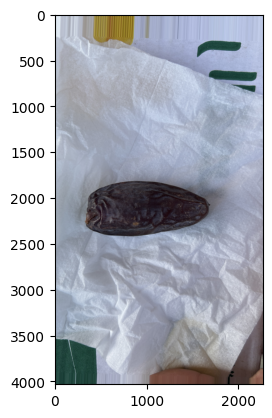

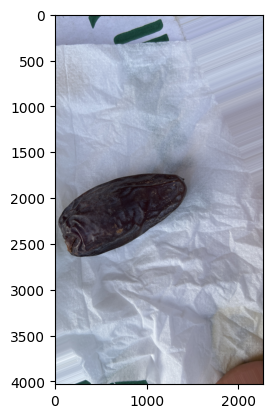

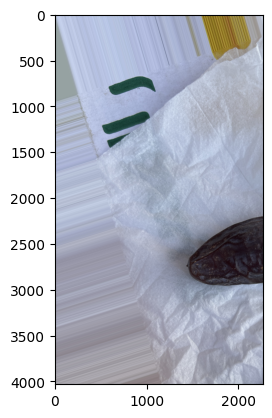

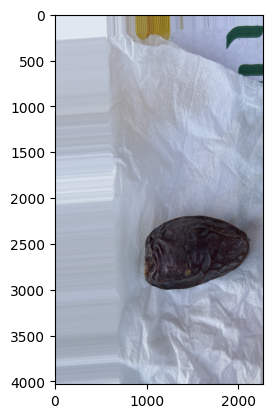

In [7]:
import matplotlib.pyplot as plt

# Load an example image
img = load_img('ambar/ambar_1.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Visualize 4 augmented versions of the image
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i > 3:
        break
plt.show()